# Función auxiliar v(x) or meyeraux(x)
* Polinomio definido para ser una funcion creciente y monotona entre 0 y 1.  
* Es simétrica respecto de (x=0.5, y=0.5).  
* Se usará dentro de sin() y cos().  
* Para que el sin y cos vayan de 0 a 1 se usa $sin(\frac{\pi}{2} v(x))$

In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


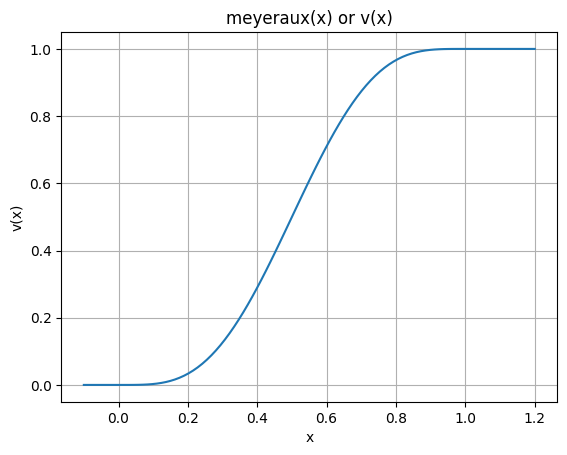

In [4]:
# Funcion auxiliar

import numpy as np
import matplotlib.pyplot as plt

from boostlets_mod import meyeraux

x = np.linspace(-0.1, 1.2, 100)
v_vect = meyeraux(x) 

plt.plot(x, v_vect)
plt.xlabel('x')
plt.ylabel('v(x)')
plt.title('meyeraux(x) or v(x)')
plt.grid(True)
plt.show()

# Funcion de Meyer $b(\omega)$ o meyerhelper(x)
- Función a trozos entre 0 y 1
- Depende de una "frecuencia" o "escala"
- Utiliza partes que son 0 y partes que son 1 y funciones para que si entre varias escalas hay un solape, se pueda obtener 0 o 1.
    + Las funciones usadas son $sin()$ y $cos()$, para que sus cuadrados sean 1. 
- Es una función simétrica respecto del eje $y$. (limitamos a parte positiva para ahorrar espacio).
    + $sin(\frac{\pi}{2}v(|\omega|-1))$  para $1 \leq \omega \leq 2$
    + $cos(\frac{\pi}{2}v(\frac{|\omega|}{2}-1))$  para $2 \leq \omega \leq 4$
    + $0$ otherwise

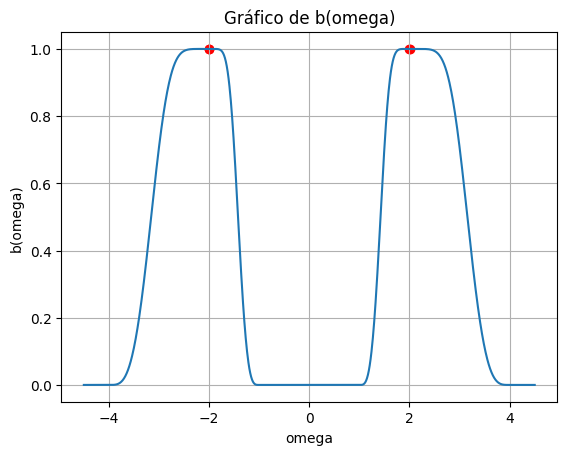

In [5]:
from boostlets_mod import meyerhelper

omega = np.linspace(-4.5, 4.5, 1001)
b_vect = meyerhelper(omega)

# Graficamos los resultados
plt.plot(omega, b_vect)
# plt.plot(omega, b_vect==1.0, 'o')
plt.scatter(omega, [1.0 if b_val == 1.0 else np.nan for b_val in b_vect], color='red', label='b(omega) == 1.0')
plt.xlabel('omega')
plt.ylabel('b(omega)')
plt.title('Gráfico de b(omega)')
plt.grid(True)
plt.show()

## Funcion con  limites generales

Defino $b(\omega)$ como un sin() para $\omega$ entre a y b y un cos() para $\omega$ entre b y c.  
Quiero una función que al escalar $\omega$ con $\alpha$:  $b(\alpha \omega)$, se haya escalado hacia la izquierda (mas cercana a 0), osea $\alpha<1$ y tal que  
$b^2(\omega)$ + $b^2(\alpha \omega)$ = 1.  
Es decir, la parte del sin() de $b(\omega)$ coincida con la parte de cos() de $b(\alpha \omega)$.  
Para eso se debe cumplir:  
$\alpha b = a$  
$\alpha c = b$  
por lo que se debe cumplir para los límites:  
$c = b^2/a$  
y para el escalado:  
$\alpha = a/b$  

Ahora se define $\Psi_1(\omega) = \sqrt{b^2(\omega) + b^2(\omega/\alpha)}$,  
que es 1 para $\omega \in [a, b]$   
tiene un sin() para $\omega \in [\alpha a, a]$  
y un cos() en $\omega \in [b, c]$.

Si quiero una $\Psi_1( \gamma \omega)$ de tal forma que su cola con el cos() coincida con el sin() de $\Psi_1(\omega)$, es decir:  
sin() para $\omega \in [\alpha a, a]$   
tiene que coincidir con  
cos() en $\gamma \omega \in [\gamma b, \gamma c]$.  
Por lo que $\gamma = \alpha^2 = (a/b)^2$.  

Para tener un sistema con escalas, donde numero la escala con $S=0, 1, 2, ..., n$  
Puedo hacer que los $\Psi_1$ me sumen 1 en dominios más grandes de forma que  
$\sum _{s=1,S}  \Psi_1(\alpha^{2s}\omega)$ = $\Psi_1(\omega) + \Psi_1(\alpha^{2}\omega) + \Psi(\alpha^{4}\omega) + ... + \Psi(\alpha^{2S}\omega)$  
tiene soporte $\omega \in [\alpha^{2S+1} a, \alpha^{2S-2} a]$ con la siguiente división:   

Parte izquierda con un sin() está en  
$\omega \in [\alpha^{2S+1} a, \alpha^{2S} a]$  
es 1 en:  
$\omega \in [\alpha^{2S} a, \alpha^{2S-1} a]$  
y su parte a la derecha con cos()  
$\omega \in [\alpha^{2S-1} a, \alpha^{2S-2} a]$














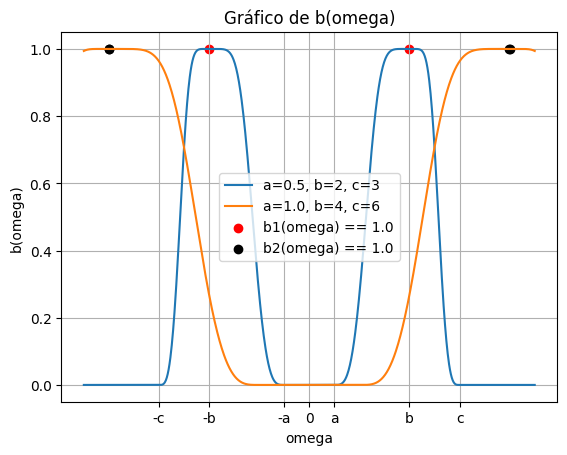

In [13]:
a, b, c = 0.5, 2, 3
b1 = meyerhelper(omega, a=a, b=b, c=c)
b2 = meyerhelper(omega, a=2*a, b=2*b, c=2*c)


# Graficamos los resultados
plt.plot(omega, b1, label=rf'a={a}, b={b}, c={c}')
plt.plot(omega, b2, label=rf'a={2*a}, b={2*b}, c={2*c}')
plt.scatter(omega[b1 == 1.0], b1[b1 == 1.0], color='red', label='b1(omega) == 1.0')
plt.scatter(omega[b2 == 1.0], b2[b2 == 1.0], color='k', label='b2(omega) == 1.0')
plt.xlabel('omega')
plt.ylabel('b(omega)')
plt.title('Gráfico de b(omega)')
plt.xticks([-c, -b, -a, 0, a, b, c], labels=["-c", "-b", "-a", "0", "a", "b", "c"])
plt.grid(True)
plt.legend()
plt.show()

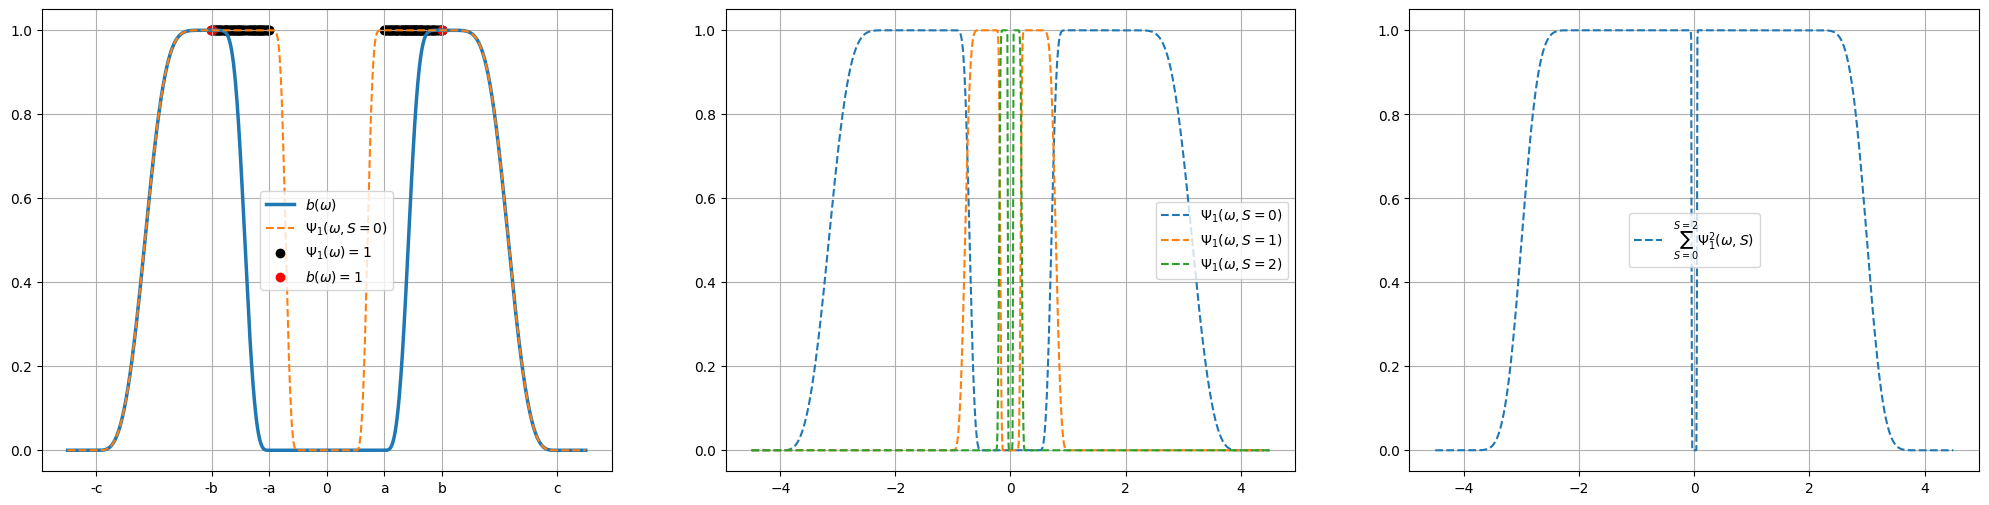

In [85]:
class Meyer_system:
    def __init__(self, a, alpha) -> None:
        self.a = a
        self.alpha = alpha
        self.b = a/alpha
        self.c = a/alpha**2
        self.gamma = alpha**2

    def b_om(self, omega):
        """ 
        support: [a,c]
        ----------------------a------------b---------------c----------------------
                  0               sin()          cos()               0
        """
        f = meyerhelper(omega, a=self.a, b=self.b, c=self.c)
        return f
    
    def psi_1(self, omega, scale):
        """ 
        Psi_1( omega ) = sqrt( b^2(omega) +  b^2(omega/alpha) )
        If we include the scale parameter S:
        Psi_1( omega / gamma^S) with S = scale
        (defined in Fourier space)
        gamma < 1  so (omega / gamma^S) = a makes the support to start at omega = gamma^S*a < a
        therefore, increasing the scale make the function to have a support closer to 0

        support: [gamma^S * a ,  ]
        ----------0-----------     sin()           cos()     ----------0------------
        ----------------------a--------------b---------------c----------------------
        ------a*alfa--------b*alfa-------c*alpha-------------------------------------
          0            sin          cos                     0 
        --------I-------------I--------------I----------------------------------------
                       sin    I      1       I     cos()     I          0
        """
        x = omega / self.gamma**scale 
        psi = np.sqrt( self.b_om(x)**2 + self.b_om(x /self.alpha)**2 )
        return psi
    
    def supp_psi_1(self, scale):
        """ 
        psi(omega/gamma^S) = a*[alpha^(2S+1), alpha^(2S-2)]
        """
        return self.a*self.alpha**(2*scale+1), self.a*self.alpha**(2*scale-2)
    
    def supp_system(self, scale):
        """ 
        support of union of psi for scales from 0 to S
        psi(omega/gamma^S) = a*[alpha^(2S+1), alpha^(-2)]
        """
        return self.a*self.alpha**(2*scale+1), self.a*self.alpha**(-2)


a, alpha = 1, 0.5
b, c = a/alpha, a/alpha**2     
mw = Meyer_system(a=a, alpha=alpha)
omega = np.linspace(-4.5, 4.5, 1001)*1
f = mw.b_om(omega)
psi_s0 = mw.psi_1(omega, 0)
psi_s1 = mw.psi_1(omega, 1)
psi_s2 = mw.psi_1(omega, 2)


x_ticks = [-c, -b, -a, 0, a, b, c] 
x_labels = ["-c", "-b", "-a", "0", "a", "b", "c"]


fig, ax = plt.subplots(1,3, figsize=(25,6) )
ax[0].plot(omega, f, '-', label=r'$b(\omega)$', linewidth=2.5)
ax[0].plot(omega, psi_s0, '--',label=rf'$\Psi_1(\omega, S={0}) $', linewidth=1.5)
ax[0].scatter(omega[psi_s0 == 1.0], psi_s0[psi_s0 == 1.0], color='k', label=r'$\Psi_1(\omega)=1$')
ax[0].scatter(omega[f == 1.0], f[f == 1.0], color='red', label=r'$b(\omega)=1$')
ax[0].set_xticks(x_ticks, labels=x_labels)
ax[0].grid(visible=True)
ax[0].legend()

ax[1].plot(omega, psi_s0, '--',label=rf'$\Psi_1(\omega, S={0}) $', linewidth=1.5)
ax[1].plot(omega, psi_s1, '--',label=rf'$\Psi_1(\omega, S={1}) $', linewidth=1.5)
ax[1].plot(omega, psi_s2, '--',label=rf'$\Psi_1(\omega, S={2}) $', linewidth=1.5)
ax[1].grid(visible=True)
ax[1].legend()

ax[2].plot(omega, psi_s0**2 + psi_s1**2 + psi_s2**2, '--',label=r'$\sum_{S=0}^{S=2} \Psi_1^2(\omega, S) $', linewidth=1.5)
ax[2].grid(visible=True)
ax[2].legend()

plt.show()



In [ ]:

omega = np.linspace(-4.5, 4.5, 1001)


b2_2om_vect = b(2 * omega)**2
b2_1om_vect = b(omega)**2

# Filtramos los valores donde b^2 es igual a 1.0 para las dispersión
scatter_omega_2om = omega[b2_2om_vect == 1.0]
scatter_omega_1om = omega[b2_1om_vect == 1.0]

# Graficamos los resultados
plt.plot(omega, b2_2om_vect, label=r'$b^2(2 \omega)$')
plt.plot(omega, b2_1om_vect, label=r'$b^2(\omega)$')

# Añadimos los puntos de dispersión en rojo
plt.scatter(scatter_omega_2om, np.ones_like(scatter_omega_2om), color='red')
plt.scatter(scatter_omega_1om, np.ones_like(scatter_omega_1om), color='red')

plt.xlabel(r'$\omega$')
plt.title(r'Gráfico de $b^2(2 \omega)$ y $b^2(\omega)$')
plt.grid(True)
plt.legend()
plt.show()

# Funciones para crear un shearlet $\Psi$:
+ El "hat" ^ indica que estamos en espacio de Fourier
+ $\hat{\Psi} = \hat{\Psi}_1 \hat{\Psi}_2$
+ $\Psi$ : shearlet
+ $\hat{\Psi}_1$ : Funcion con escalas laterales $\hat{\Psi}_1(\omega) \neq 0$ para $\omega $ en $[-4, \frac{-1}{2}]$ U $[\frac{1}{2}, 4]$
+ $\hat{\Psi}_2$ : Funcion simetrica con $\hat{\Psi}_2(\omega) \neq 0$ para $\omega$ en $[-1, 1]$ 

Se define la funcion $\Psi_1$ en fourier como:  
$\hat\Psi_1 = \sqrt{b^2(2\omega) + b^2(\omega)}$  

En la parte de omega positiva:  
La funcion $b^2(\omega)$ tiene una parte ascendente similar a $sin^2(\omega)$ seguido de una parte descendente parecida a $cos^2(\omega/2)$

Al combinar la funcion $b^2(\omega)$ con otra de doble de frecuencia $b^2(2\omega)$, hay una zona donde se solapan estas funciones.  
En azul, la parte descendente de $b^2(2\omega)$, es de tipo $cos^2(\omega)$.  
En naranja, la parte ascendente de $b^2(\omega)$ es de tipo $sin^2(\omega)$.  
Las partes que se solapan tienen las mismas frecuencias, son complementarias (suman 1).

In [ ]:
def psi_1_fou(omega): 
    a1 = b(2*omega)**2
    a2 = b(omega)**2
    return np.sqrt(a1 + a2)

omega = np.linspace(-4.5, 4.5, 1001)
f1 = psi_1_fou(omega)

# Graficamos los resultados
plt.plot(omega, b2_2om_vect, '--', label=r'$b^2(\omega)$')
plt.plot(omega, b2_1om_vect, '--', label=r'$b^2(2 \omega)$')
plt.plot(omega, f1, label=r'$\hat{\Psi}_1(\omega)$')

plt.scatter(omega[f1 == 1.0], np.ones_like(omega[f1 == 1.0]), color='red', label=r'$\hat{\Psi}_1(\omega) == 1.0$')
plt.xlabel('omega')
plt.title('psi_1_fou (omega)')
plt.grid(True)
plt.legend()
plt.show()


     

## Funcion $\Psi_2$

Es simétrica y solo toma valores entre 0 y 1 para $\omega$ en $[-1,1]$  
+ $\hat{\Psi_2}(\omega) = \sqrt{v(1-|\omega|)}$

In [ ]:
def psi_2_fou(omega): 
    return np.sqrt(v(1-np.abs(omega)))

omega = np.linspace(-4.5, 4.5, 1001)
f2 = psi_2_fou(omega)

plt.plot(omega, f2, label=r'$\hat{\Psi}_2(\omega)$')
plt.scatter(omega[f2 == 1.0], np.ones_like(omega[f2 == 1.0]), color='red', label=r'$\hat{\Psi}_2(\omega) == 1.0$')

plt.xlabel(r'$\omega$')
plt.title('psi_2_fou (omega)')
plt.grid(True)
plt.legend()
plt.show()

# $\Psi$, shearlet en cono

In [ ]:
def psi_12_fou(omega1, omega2):
    with np.errstate(divide='ignore', invalid='ignore'):
        ratio = omega2 / omega1
        ratio[omega1 == 0] = 0  # Ajuste manual para evitar la división por cero
        result = psi_1_fou(omega1) * psi_2_fou(ratio)
        result[omega1 == 0] = 0  # Establecer 0 donde omega1 es 0
    return result

m = 501
n = 501

omega1 = np.linspace(-4.5, 4.5, n)
omega2 = np.linspace(-4.5, 4.5, m)

# Usar broadcasting para calcular el plano psi_fou_plane
omega1_grid, omega2_grid = np.meshgrid(omega1, omega2)
psi_fou_plane = psi_12_fou(omega1_grid, omega2_grid)


# Graficar el resultado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Primer gráfico: Colormap de psi_fou_plane
c1 = ax1.pcolor(omega1, omega2, psi_fou_plane, shading='auto')
fig.colorbar(c1, ax=ax1)
ax1.set_title(r'$\Psi=\Psi_1(\omega_1)\Psi_2\left(\frac{\omega_2}{\omega_1}\right)$')
ax1.set_xlabel(r'$\omega_1$')
ax1.set_ylabel(r'$\omega_2$')

# Segundo gráfico: Valores cero en psi_fou_plane
psi_fou_plane_zero = np.where(psi_fou_plane == 0, 1, np.nan)
c2 = ax2.pcolor(omega1, omega2, psi_fou_plane_zero, shading='auto')
ax2.set_title(r'Valores cero en $\Psi$')
ax2.set_xlabel(r'$\omega_1$')

plt.show()

Al usar $\Psi_1(\omega_1)$ marcamos los límites verticales en $-4$, $\frac{-1}{2}$, $\frac{1}{2}$ y $4$.
Al usar $\Psi_2(\omega_2/\omega_1)$ se establecen los límites diagonales (donde $|\omega|=|\omega_2 / \omega_1|=1$).

# Añadir otras escalas "a" y shears "s"

In [ ]:
def meyerShearletSpect(x, y, a, s):
    # Transformaciones de las coordenadas
    y_trans = np.sqrt(a) * (s * x + y)
    x_trans = a * x

    # Evitar división por cero reemplazando 0 por 1 en x_trans
    x_safe = np.where(np.abs(x_trans) == 0, 1, x_trans)

    # Cálculo del espectro Meyer-Shearlet
    Psi = psi_1_fou(x_trans) * psi_2_fou(y_trans / x_safe)
    
    return Psi



In [ ]:
def boostShearletSpect(k, om, a, theta):
    # Transformaciones de las coordenadas
    kb  = a * (  k * np.cosh(theta) - om * np.sinh(theta) )
    omb = a * ( om * np.cosh(theta) -  k * np.sinh(theta) )

    # Evitar división por cero reemplazando 0 por 1 en x_trans
    kb_safe = np.where(np.abs(kb) == 0, 1, kb)

    # Cálculo del espectro Meyer-Shearlet
    Psi = psi_1_fou(kb) * psi_2_fou(omb / kb_safe)
    
    return Psi

In [ ]:
m = 501
n = 501

omega1 = np.linspace(-4.5, 4.5, n)
omega2 = np.linspace(-4.5, 4.5, m)

# Usar broadcasting para calcular el plano psi_fou_plane
omega1_grid, omega2_grid = np.meshgrid(omega1, omega2)



In [ ]:
a, s = 2, 0.6
Psi = meyerShearletSpect(x=omega1_grid, y=omega2_grid, a=a, s=s)

# Graficar el resultado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Primer gráfico: Colormap de psi_fou_plane
c1 = ax1.pcolor(omega1, omega2, Psi, shading='auto')
fig.colorbar(c1, ax=ax1)
ax1.set_title(f'Shearlet $\\Psi$. a={a}, Shear={s}')
ax1.set_xlabel(r'$\omega_1$')
ax1.set_ylabel(r'$\omega_2$')

# Segundo gráfico: Valores cero en psi_fou_plane
psi_fou_plane_zero = np.where(Psi == 0, 1, np.nan)
c2 = ax2.pcolor(omega1, omega2, psi_fou_plane_zero, shading='auto')
ax2.set_title(r'Valores cero en $\Psi$')
ax2.set_xlabel(r'$\omega_1$')

plt.show()




In [ ]:
a, s = 1, 0.6
# ----------------------------------------------------------------------
Psi2_h = boostShearletSpect(k=omega1_grid, om=omega2_grid, a=a, theta=s)
Psi2_v = boostShearletSpect(k=omega2_grid, om=omega1_grid, a=a, theta=s*2)
Psi2 = Psi2_v + Psi2_h
# ----------------------------------------------------------------------

# Graficar el resultado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Primer gráfico: Colormap de psi_fou_plane
c1 = ax1.pcolor(omega1, omega2, Psi2, shading='auto')
fig.colorbar(c1, ax=ax1)
ax1.set_title(f'Boostlets $\\Psi$. a={a}, theta={s}')
ax1.set_xlabel(r'$\omega_1$')
ax1.set_ylabel(r'$\omega_2$')

# Segundo gráfico: Valores cero en psi_fou_plane
psi_fou_plane_zero = np.where(Psi2 == 0, 1, np.nan)
c2 = ax2.pcolor(omega1, omega2, psi_fou_plane_zero, shading='auto')
ax2.set_title(r'Valores cero en $\Psi$')
ax2.set_xlabel(r'$\omega_1$')

plt.show()


# Cosas que quedan:
+ Enseñar qué pasa con otras escalas
+ Enseñar el efecto de los shears
+ Añadir la función para la zona central (low freqs) o "scaling function"